In [2]:
#!jupyter nbconvert --to=python MLDspatial_python3.ipynb

# After changes in the script using Jupyter notebook, save the notebook, run this line, and clear the output.

[NbConvertApp] Converting notebook MLDspatial.ipynb to python
[NbConvertApp] Writing 11011 bytes to MLDspatial.py


In [3]:
class MLDspatial_global:
    '''
    Calculate mixed layer depth after Monterey and Levitus, (1997) who 
    compute MLD as the depth at which the density over depth differsby 0.125 sigma units 
    from the surface density (Griffies et al., 2009). 
    This MLD definition was also supported in FESOM1.4 (-->MLD2) 
    
    Definition of Large et al. (1997), who suggest to compute MLD
    as the shallowest depth where the vertical derivative of buoyancy
    is equal to a local critical buoyancy gradient (Griffies et al., 2009) (-->MLD1).
    
    C.f. oce_ale_pressure_bv.F90
    
    comp. to FESOM 1.4: 
    'mlotst'  : mixed layer depth [m], computed with Levitus method (with 0.125 kg/m3 criterion)
    'omldamax': daily maximum ocean mixed layer thickness [m] defined by mixing scheme
    '''
    def __init__(self,runname,resultpath,savepath,meshpath,first_year,last_year,
                 WOAvar='n_an',
                 mapproj = 'pc',
                 savefig=False):

        self.runname = runname
        self.resultpath = resultpath
        self.savepath = savepath
        self.meshpath = meshpath
        self.fyear = first_year
        self.lyear = last_year
        self.mapproj = mapproj
        self.savefig = savefig


        import matplotlib.pyplot as plt
        import numpy as np
        #from netCDF4 import Dataset
        #from scipy.interpolate import griddata
        import skill_metrics as sm
        import cartopy.crs as ccrs
        #import pickle

        import pyfesom2 as pf
        
        # load FESOM data -------------------------------------------------------------------------------------
        mesh       = pf.load_mesh(meshpath)
        years = [self.fyear, self.lyear]

        # check variables
        #NCfesom = self.resultpath + '/MLD1.'+self.runname+'.'+str(self.fyear)+'.nc'
        #!ncdump -h $NCfesom

        labelfesom = 'MLD2 {0}-{1}'.format(self.fyear,self.lyear)
        unitfesom = 'MLD2 [m]' 

        # load data -------------------------------------------------------------------------------------
        MLDmax = pf.get_data(resultpath, "MLD2", years, mesh, how="max", compute=True, runid=self.runname, silent=True)
        MLDmin = pf.get_data(resultpath, "MLD2", years, mesh, how="min", compute=True, runid=self.runname, silent=True)
        MLDmean = pf.get_data(resultpath, "MLD2", years, mesh, how="mean", compute=True, runid=self.runname, silent=True)

        #print(np.shape(MLDmax))

        
        #-----------------------------------------------
        # reading modelled CO2 flux
        #-----------------------------------------------
        
        #var_id ='omldamax'         # daily maximum ocean mixed layer thickness [m] defined by mixing scheme
        #var_id2 ='mlotst'          # mixed layer depth [m], computed with Levitus method (with 0.125 kg/m3 criterion)
        
        print("*** Using MLD2 (Monterey and Levitus, 1997). ***")
        #print("Previous FESOM1.4 methods were:")
        #print("'omldamax': daily maximum ocean mixed layer thickness [m] defined by mixing scheme")
        #print("'mlotst'  : mixed layer depth [m], computed with Levitus method (with 0.125 kg/m3 criterion)")
        
 

        # plot ------------------------------------               
        figMLD = pf.plot(mesh, [MLDmax, MLDmin, MLDmean],
                        rowscol = (3,1),
                        #levels = (0,35,36),
                        units = unitfesom, 
                        mapproj=self.mapproj, # robinson projection takes more time!
                        titles=['max '+labelfesom,'min '+labelfesom,'mean '+labelfesom],
                        cmap='RdYlGn',
                        figsize = (20,20))
        
        if(self.savefig == True):
            plt.savefig(self.savepath+self.runname+'_'+'MLDspatial'+'_'+str(years[0])+'to'+str(years[1])+'.png', 
                    dpi = 300, bbox_inches='tight')
            
        plt.show(block=False)

(126858,)
*** Using MLD2 (Monterey and Levitus, 1997). ***


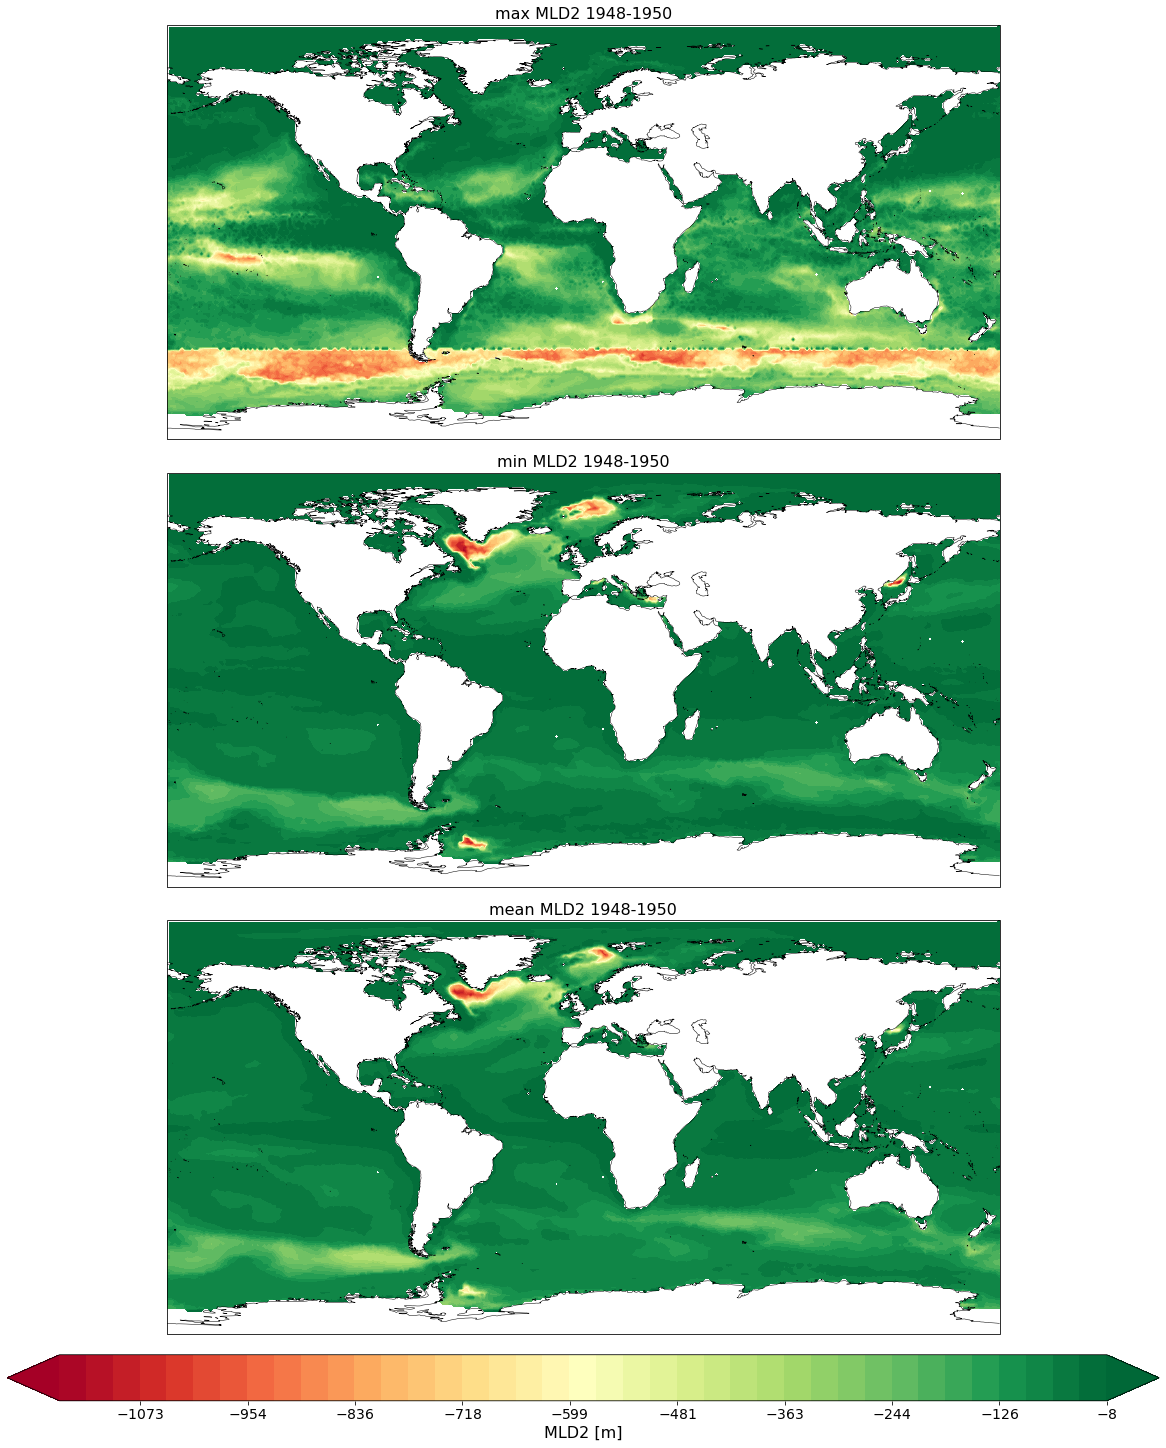

In [4]:
### TESTING ###
if __name__ == "__main__":
    
    # run specification -------------------------------------------------------------------------------------
    runid      =  'mo1'
    layerwise    = False

    resultpath = '/work/ollie/mozeisin/results/f2r1.2/' + runid
    savepath = '/home/ollie/mozeisin/evaluation/mo_files/'

    htmlname     =  runid + '.html'
    htmlpath = '/home/ollie/mozeisin/evaluation/mo_files/html/'

    meshpath = '/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz'

    # period of analysis ------------------------------------------------------------------------------------

    first_year = 1948
    last_year  = 1950
    years = [first_year, last_year]

    # now test:
    test = MLDspatial_global(runid,resultpath,savepath,meshpath,first_year,last_year,savefig=False)